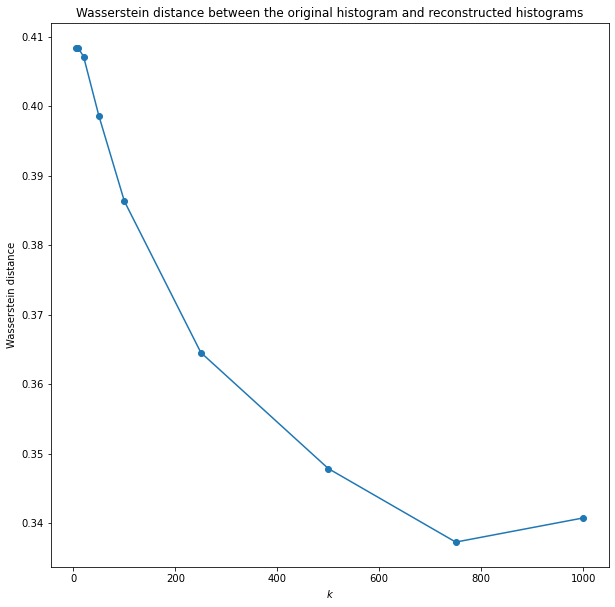

In [45]:
import pandas as pd

df = pd.read_csv("results/result.csv")
fig, axes = plt.subplots(1, 1, figsize=(10, 10))
plt.plot(df["size"], df["wasserstein"])
plt.scatter(df["size"], df["wasserstein"])
plt.title("Wasserstein distance between the original histogram and reconstructed histograms")
plt.xlabel("$k$")
plt.ylabel("Wasserstein distance")
plt.savefig("results/wasser.jpeg")

100%|██████████| 9/9 [04:14<00:00, 28.24s/it]


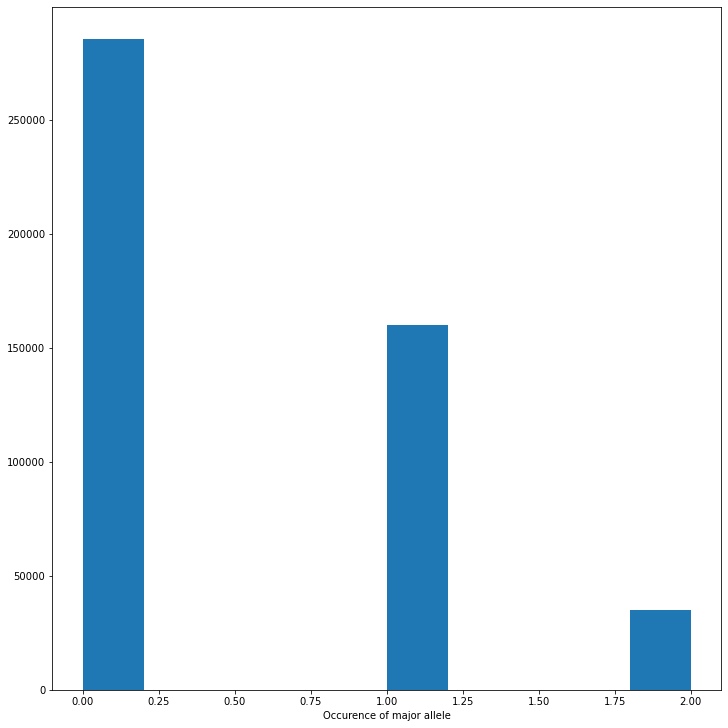

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from FADS_SRP.models import supervised_autoencoder, compiled_autoencoder
from FADS_SRP.input import get_dsets_
from tqdm import tqdm
from scipy.stats import wasserstein_distance
from pandas import DataFrame

def get_dset(h2s, sim_i):
    P = f"/home/shussain/Simulated_data/15042021/{h2s}/simulation_output{sim_i}"
    return get_dsets_(P)

out = []
mse = []
wd = []
sizes = [1000, 750, 500, 250, 100, 50, 20, 10, 5]

dset = get_dset(0.5, 1)

fig, ax = plt.subplots(1, 1, figsize=(10, 10), constrained_layout=True)
plt.hist(dset["X_train"].ravel())
plt.xlabel("Occurence of major allele")
#plt.savefig("/home/shussain/final_report/bottleneck/results/original.jpeg")

for size in tqdm(sizes):
    hist, model = supervised_autoencoder(dset["X_train"], dset["y_train"], sizes=[size], input_shape=1000, reconstruction_weight=0.8)
    out_ = model(dset["X_train"])[1].numpy()
    out.append(out_)
    wd.append(wasserstein_distance(dset["X_train"].ravel(), out_.ravel()))
    mse.append(hist.history["loss"][-1])
    


#plt.savefig("/home/shussain/final_report/bottleneck/results/result.jpeg")

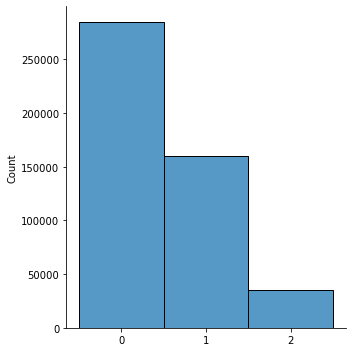

In [35]:
import seaborn as sns
x = list(map(str, dset["X_train"].ravel()))
sns.displot(x=x)

In [87]:
dum=["Original"]*480000 + ["Reconstructed"]*480000

In [119]:
sns.set_theme(context='paper', style="white", font_scale=3)

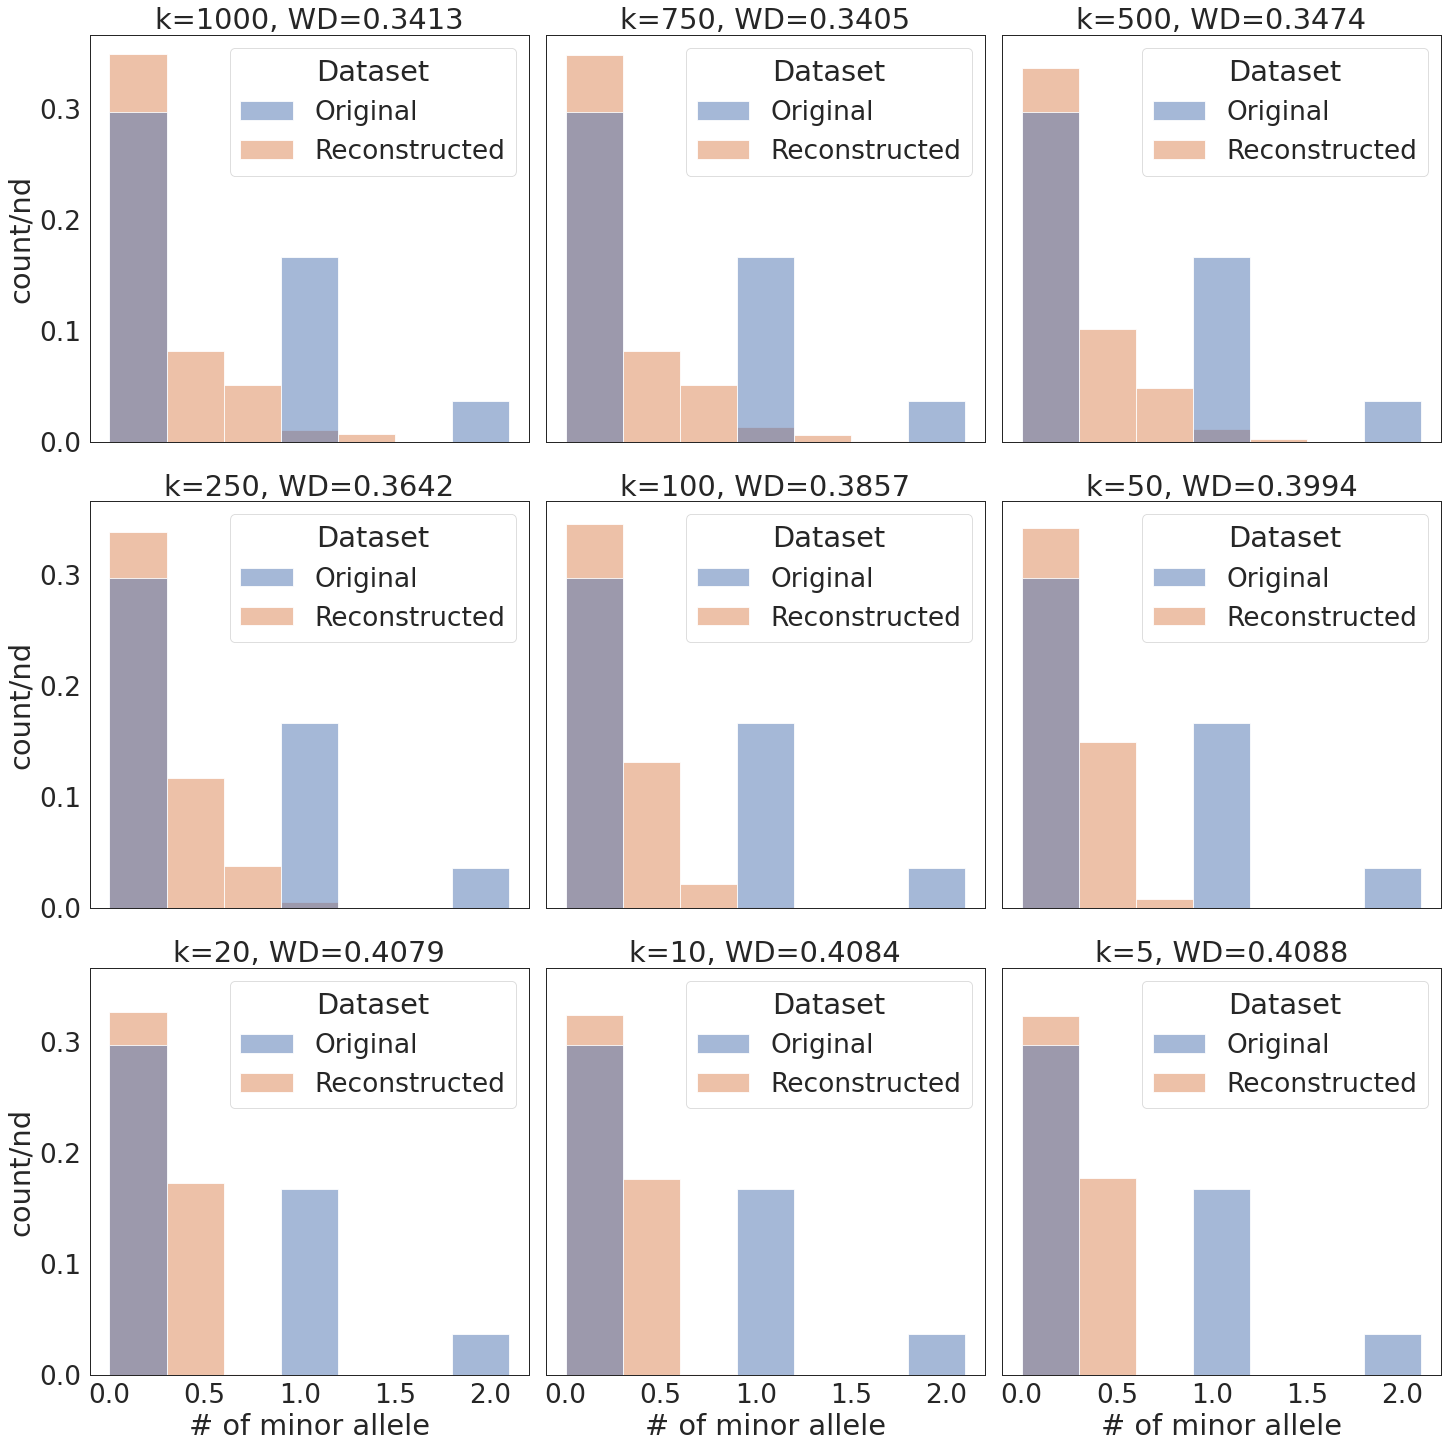

In [120]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20), sharex=True, constrained_layout=True, sharey=True)
#plt.tight_layout()
for size, X_train_hat, m, w, ax in zip(sizes, out, mse, wd, axes.ravel()):
    plt.sca(ax)
    df = pd.DataFrame(
        {
            "Dataset": dum,
            "# of minor allele": list(dset["X_train"].ravel()) + list(X_train_hat.ravel())
        }
    )
    sns.histplot(df, x="# of minor allele", ax=ax, hue="Dataset", stat="probability", binwidth=0.3, binrange=(0, 2))
    #sns.histplot(X_train_hat.ravel(), ax=ax, stat="probability", binwidth=0.5)
    ax.set_title(f"k={size}, WD={str(w)[:6]}")
    ax.set_ylabel("count/nd")

plt.savefig("/home/shussain/final_report/bottleneck/results/result.jpeg")

In [108]:
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

/home/shussain/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


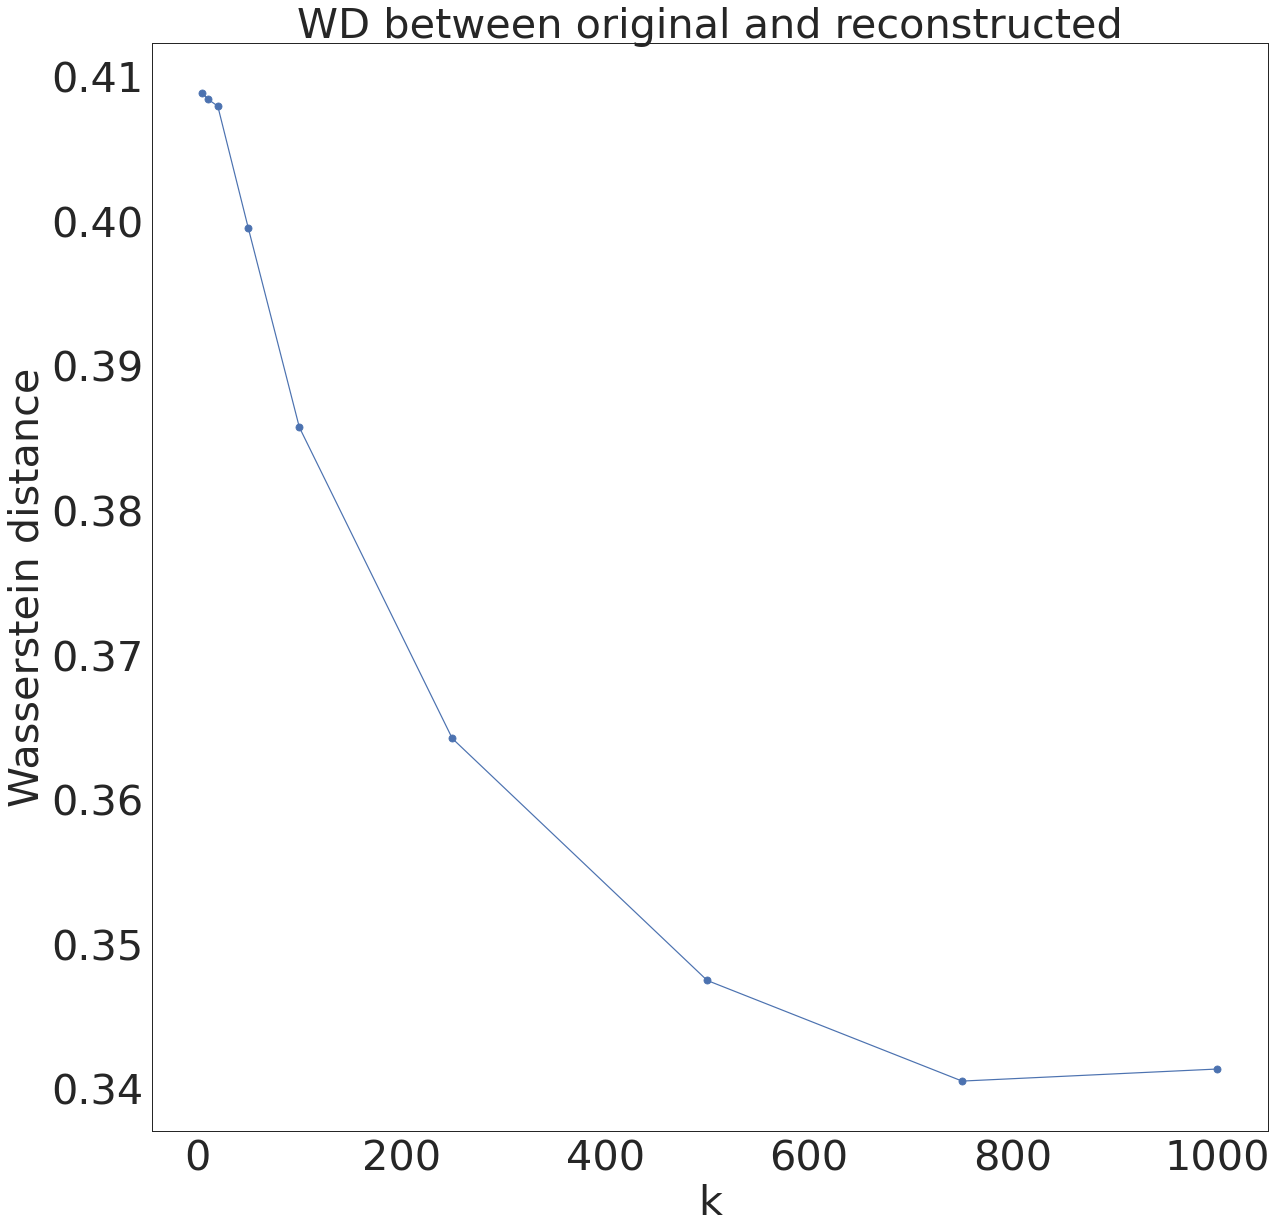

In [116]:
fig, axes = plt.subplots(1, 1, figsize=(20, 20))
sns.lineplot(sizes, wd, palette="red")
plt.scatter(sizes, wd, s=50)
plt.title("WD between original and reconstructed")
plt.xlabel("k")
plt.ylabel("Wasserstein distance")

plt.savefig("/home/shussain/final_report/bottleneck/results/wd.jpeg")